In [1]:
import vaex
import numpy as np
import pandas as pd
import torch
from glob import glob
from matplotlib import pyplot as plt
from os.path import join, abspath
import sys
from sklearn.model_selection import train_test_split

In [2]:
root_dir = abspath("..")
root_data_dir = abspath(join(root_dir, "Data"))
root_dir, root_data_dir

('/home2/s20321005/Thesis-Project', '/home2/s20321005/Thesis-Project/Data')

In [3]:
if not root_dir in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/2_Cleaning',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir

In [5]:
name = "Machine_Learning"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Machine_Learning already exist. Good to go!


In [6]:
gums_dir = abspath(join(root_data_dir, "GUMS"))
gums_dir

'/home2/s20321005/Thesis-Project/Data/GUMS'

In [7]:
gums_file = join(gums_dir, "gums-filtered.hdf5")
gums = vaex.open(gums_file)
gums

#,ra,dec,barycentric_distance,pmra,pmdec,radial_velocity,mag_g,mag_bp,mag_rp,feh,alphafe,mass,population,logg,teff,spectral_type,l,b,z,r,M_G,pmlon,pmlat,vb,vphi,w,v_xy,v,u,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D
0,5.847591977672443,-1.5707963267948943,83.612,66.7089,50.11444,-12.412354,19.221436,20.362885,18.116106,0.11254041,0.012468732,0.552,1,4.757,3828.2473,K9V,5.287159505112386,-0.4734773249532965,-38.12571840737445,74.41368192926113,14.610092,-21.970798913426503,-80.49110872075164,-31.900306854091067,-8.707486308821851,-22.73105974640351,-25.592870953883583,-6.60502277687071,-26.21429067507792,-26.21429067507792,-6.60502277687071,-15.48105974640351,2.455557488748066e-06,3.497003004128416e-07,2.8647748810125506e-09,0.14241177492901289,122.06903332286987,0.015078893816013128
1,5.772912596320462,-1.5707963267948915,140.15117,18.354284,-39.722267,45.88338,19.141418,19.854698,18.28151,0.05160391,0.005072151,0.896,1,4.454,5675.4463,G2.5V,5.287159505112388,-0.47347732495329836,-63.90666445275529,124.732868006167,13.408435,-40.2480883727991,17.170603996679077,11.406716240598774,-26.737470818373968,-10.770237650815776,46.03693949672859,47.46883903624173,24.103971966052015,24.103971966052015,47.46883903624173,-3.520237650815776,3.323121497047419e-08,3.226470738652992e-08,5.848037289781763e-10,0.9709156711602928,55.17185644986538,0.10280283576991335
2,5.8273171032099915,-1.5707963267948921,126.98487,51.50644,-44.02756,-5.379475,16.723316,17.1123,16.147518,-0.04257653,0.021453567,1.006,1,4.515,5584.702,G3V,5.287159505112387,-0.4734773249532982,-57.90304571842579,113.01501996072446,11.204556,-67.73479209988463,1.8268451808413657,1.0995932554540222,-40.77013275876554,3.431578456661821,-4.286271941294539,31.888870335777256,-25.761906005380915,-25.761906005380915,31.888870335777256,10.681578456661821,2.2159278932227859e-07,7.729903492467035e-08,9.561010202269157e-10,0.34883371052407625,80.84818788952303,0.036935334055490425
3,5.831565318853015,-1.5707963267944784,5.021281,-3390.435,-863.4128,79.27912,18.5561,19.199005,17.743185,-0.6130799,0.26896033,0.958,2,4.092,6053.4087,F6.5IV,5.287159505112678,-0.4734773249536209,-2.2896227530640925,4.4688799687357195,20.052029,2104.429618886982,2794.978979469341,66.52293365908181,50.08725752706905,23.0546211013151,100.89085309516918,12.809435006614486,111.90896291032843,111.90896291032843,12.809435006614486,30.3046211013151,2.1612868765956487e-09,3.665306431063734e-08,1.2772027054932098e-09,16.958907541404876,28.69792254040305,1.7956490337958104
4,5.843680675200906,-1.5563824276254117,166.21375,37.167286,20.467144,7.860309,14.172444,14.969129,13.251131,0.2810122,-0.014306631,0.594,1,4.72,3953.6663,K8V,5.2971984487768555,-0.4848087627414201,-77.46211550330851,147.05995283432352,8.06911,-16.47851947915654,-39.09948238020873,-30.804650429164813,-12.982653509565218,-30.918060409637242,-7.401654415993237,6.739147684135978,-13.338578212636566,-13.338578212636566,6.739147684135978,-23.668060409637242,9.778220295155898e-07,2.1214454250785123e-07,1.9740888120698574e-09,0.21695619049710613,107.46453817618011,0.022971831934987707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,327,243",5.3227728071214795,1.5547668647688142,73.78807,38.417828,50.192844,30.891592,10.856715,11.292931,10.238791,0.098279044,0.02843636,0.672,1,4.658,4920.3955,K1.5V,2.1289323330983208,0.4673871997753025,33.245602804447515,65.8741927362708,6.5167837,61.08676626931133,-16.237551933229454,-5.679172364770294,21.3654297320456,8.848296174985109,30.13720477141697,2.1622481786816596,-36.87895581335084,-36.87895581335084,2.1622481786816596,16.09829617498511,1.3573843876866067e-06,2.467490080903405e-07,2.2309457098911118e-09,0.18178270674740515,110.60287437581073,0.019247580714431133
"1,327,244",5.282399454425923,1.5560105418750598,97.30824,61.020737,-32.075333,-17.297888,20.554504,20.845217,20.07421,-0.06657888,0.024732176

In [137]:
columns = ["pmra", "pmdec", "mag_g", "mag_bp", "mag_rp", "feh", "alphafe", "logg", "teff", "TD_D", "population" , "radial_velocity", "barycentric_distance"]

df_vaex = gums[columns]
df_vaex

#,pmra,pmdec,mag_g,mag_bp,mag_rp,feh,alphafe,logg,teff,TD_D,population,radial_velocity,barycentric_distance
0,66.7089,50.11444,19.221436,20.362885,18.116106,0.11254041,0.012468732,4.757,3828.2473,0.015078893816013128,1,-12.412354,83.612
1,18.354284,-39.722267,19.141418,19.854698,18.28151,0.05160391,0.005072151,4.454,5675.4463,0.10280283576991335,1,45.88338,140.15117
2,51.50644,-44.02756,16.723316,17.1123,16.147518,-0.04257653,0.021453567,4.515,5584.702,0.036935334055490425,1,-5.379475,126.98487
3,-3390.435,-863.4128,18.5561,19.199005,17.743185,-0.6130799,0.26896033,4.092,6053.4087,1.7956490337958104,2,79.27912,5.021281
4,37.167286,20.467144,14.172444,14.969129,13.251131,0.2810122,-0.014306631,4.72,3953.6663,0.022971831934987707,1,7.860309,166.21375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,327,243",38.417828,50.192844,10.856715,11.292931,10.238791,0.098279044,0.02843636,4.658,4920.3955,0.019247580714431133,1,30.891592,73.78807
"1,327,244",61.020737,-32.075333,20.554504,20.845217,20.07421,-0.06657888,0.024732176,8.21,4742.4214,0.030044592372383012,1,-17.297888,97.30824
"1,327,245",48.82033,35.40954,9.856618,10.131072,9.408596,-0.08244268,0.039174337,4.181,6109.4204,0.02141158745286378,2,21.854038,155.89896
"1,327,246",47.412453,51.89462,8.990281,9.204407,8.624119,-0.036068216,-0.0076244753,4.186,6531.3057,0.026340258194088025,1,17.276598,138.08827


In [193]:
columns_ml = ["pmra", "pmdec", "mag_g", "mag_bp", "mag_rp", "feh", "alphafe", "logg", "teff", "TD_D", "population" , "radial_velocity", "barycentric_distance"]
dim = len(columns_ml)-1
N = 10_000
df = df_vaex[:N].to_pandas_df()
df = df[columns_ml]
df = df.sample(frac=1, replace=False)
df.dropna(inplace=True)
df

,pmra,pmdec,mag_g,mag_bp,mag_rp,feh,alphafe,logg,teff,TD_D,population,radial_velocity,barycentric_distance
472,30.307877,-87.596725,17.035139,18.566036,15.768909,-0.044839,0.034586,5.112,3228.494141,0.110061,1,7.607318,108.692841
6237,130.214447,-17.946184,12.373453,13.166031,11.454768,0.371646,-0.006892,4.728,3935.500732,0.116288,1,-45.007412,69.751625
8129,24.015926,-19.739418,16.649691,17.767447,15.554078,-0.057904,0.057961,4.933,3515.604492,0.039125,1,-31.277515,222.668106
74,-3.744414,-12.957287,7.705760,7.808329,7.517397,0.081964,-0.011921,4.079,7852.356445,0.011715,1,8.852784,148.247070
6701,-42.861504,-31.832678,21.447157,21.738420,20.966200,-0.208731,0.106470,8.480,5956.623047,0.965628,1,48.566162,211.927963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-12.394957,4.333417,16.710106,17.830523,15.606774,0.062230,0.028814,4.998,3443.499268,0.009783,1,3.334246,165.756958
7715,-35.543842,-65.145256,16.157635,17.086515,15.155587,0.116075,-0.007395,5.009,3639.150391,8.422765,1,66.444519,154.787323
7692,1.394395,-15.904749,15.584145,16.514668,14.584571,-0.000205,0.021244,4.877,3741.105957,0.011020,1,10.385887,187.861755
4684,46.646717,-36.102989,22.470600,22.761923,21.989574,-0.207875,0.063161,8.210,4742.421387,0.081043,1,-33.469707,234.869034


In [194]:
X = df[[c for c in df.columns if c != 'population']]
y = np.where(df['population'] == 1, 1, 0)
X, y

(            pmra      pmdec      mag_g     mag_bp     mag_rp       feh  \
 472    30.307877 -87.596725  17.035139  18.566036  15.768909 -0.044839   
 6237  130.214447 -17.946184  12.373453  13.166031  11.454768  0.371646   
 8129   24.015926 -19.739418  16.649691  17.767447  15.554078 -0.057904   
 74     -3.744414 -12.957287   7.705760   7.808329   7.517397  0.081964   
 6701  -42.861504 -31.832678  21.447157  21.738420  20.966200 -0.208731   
 ...          ...        ...        ...        ...        ...       ...   
 779   -12.394957   4.333417  16.710106  17.830523  15.606774  0.062230   
 7715  -35.543842 -65.145256  16.157635  17.086515  15.155587  0.116075   
 7692    1.394395 -15.904749  15.584145  16.514668  14.584571 -0.000205   
 4684   46.646717 -36.102989  22.470600  22.761923  21.989574 -0.207875   
 5162   21.998571  12.166841  16.627083  17.564688  15.635295 -0.713160   
 
        alphafe   logg         teff      TD_D  radial_velocity  \
 472   0.034586  5.112  3228.494

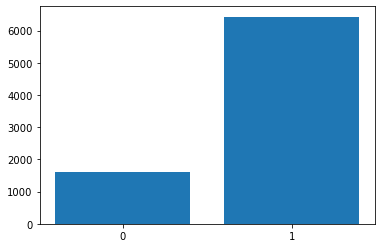

In [195]:
# plot bar y distribution, with labels '1' and '0'
plt.bar([0, 1], [np.sum(y == 0), np.sum(y == 1)])
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [196]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[8.01410096e-01, 6.71846155e-01, 3.77535062e-01, ...,
        1.84299054e-80, 3.58266816e-01, 4.24876392e-01],
       [8.24816162e-01, 7.17211809e-01, 2.50125720e-01, ...,
        1.95588143e-80, 2.40998839e-01, 2.65283894e-01],
       [7.99936021e-01, 7.16043818e-01, 3.67000304e-01, ...,
        5.56951499e-81, 2.71600102e-01, 8.91980385e-01],
       ...,
       [7.94636259e-01, 7.18541462e-01, 3.37877681e-01, ...,
        4.74156614e-82, 3.64459704e-01, 7.49333773e-01],
       [8.05237953e-01, 7.05385694e-01, 5.26092585e-01, ...,
        1.31689920e-80, 2.66714133e-01, 9.41983357e-01],
       [7.99463396e-01, 7.36825398e-01, 3.66382406e-01, ...,
        7.21711472e-82, 3.44060425e-01, 9.07175385e-01]])

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)
X_train.shape, y_train.shape

((6434, 12), (6434,))

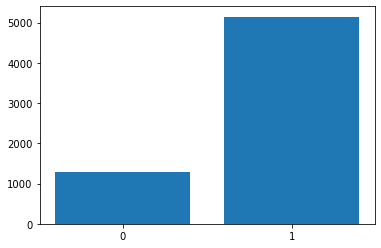

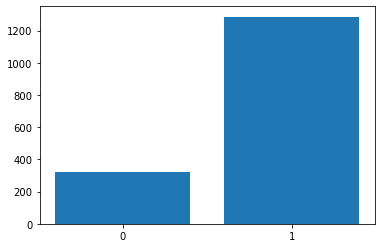

In [198]:
# check y_train distribution
plt.bar([0, 1], [np.sum(y_train == 0), np.sum(y_train == 1)])
plt.xticks([0, 1], ['0', '1'])
plt.show()

# check y_test distribution
plt.bar([0, 1], [np.sum(y_test == 0), np.sum(y_test == 1)])
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [330]:
class Net(torch.nn.Module):
    def __init__(self, dim, hidden=3):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(dim, hidden)
        self.output = torch.nn.Linear(hidden, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

net = Net(dim, 5)

In [331]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [332]:
epochs = 100_000
for epoch in range(epochs):
    inputs = torch.Tensor(X_train).float()
    labels = torch.Tensor(y_train).unsqueeze(1).float()
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print("Epoch {}/{} - Loss: {:.4f}".format(epoch+1, epochs, loss.item()))


Epoch 100/100000 - Loss: 0.5617
Epoch 200/100000 - Loss: 0.5405
Epoch 300/100000 - Loss: 0.5266
Epoch 400/100000 - Loss: 0.5159
Epoch 500/100000 - Loss: 0.5075
Epoch 600/100000 - Loss: 0.5022
Epoch 700/100000 - Loss: 0.4985
Epoch 800/100000 - Loss: 0.4958
Epoch 900/100000 - Loss: 0.4936
Epoch 1000/100000 - Loss: 0.4916
Epoch 1100/100000 - Loss: 0.4896
Epoch 1200/100000 - Loss: 0.4875
Epoch 1300/100000 - Loss: 0.4854
Epoch 1400/100000 - Loss: 0.4830
Epoch 1500/100000 - Loss: 0.4804
Epoch 1600/100000 - Loss: 0.4775
Epoch 1700/100000 - Loss: 0.4743
Epoch 1800/100000 - Loss: 0.4707
Epoch 1900/100000 - Loss: 0.4668
Epoch 2000/100000 - Loss: 0.4625
Epoch 2100/100000 - Loss: 0.4577
Epoch 2200/100000 - Loss: 0.4525
Epoch 2300/100000 - Loss: 0.4468
Epoch 2400/100000 - Loss: 0.4406
Epoch 2500/100000 - Loss: 0.4338
Epoch 2600/100000 - Loss: 0.4266
Epoch 2700/100000 - Loss: 0.4188
Epoch 2800/100000 - Loss: 0.4104
Epoch 2900/100000 - Loss: 0.4015
Epoch 3000/100000 - Loss: 0.3920
Epoch 3100/100000 -

In [333]:
# Test the model
inputs = torch.Tensor(X_test).float()
labels = torch.Tensor(y_test).unsqueeze(1).float()

outputs = net(inputs)
predicted = (outputs > 0.5).float()
accuracy = (predicted == labels).sum().item() / len(labels)
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.9820


Confusion Matrix:
[[ 294   29]
 [   7 1279]]


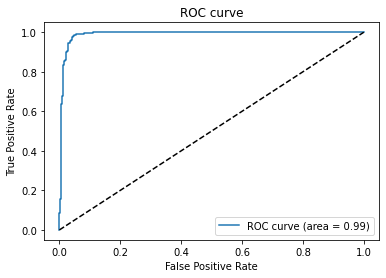

In [206]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Predict the test labels
inputs = torch.Tensor(X_test).float()
outputs = net(inputs)
predicted = (outputs > 0.5).float()

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(cm)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, outputs.detach().numpy())
auc = roc_auc_score(y_test, outputs.detach().numpy())

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()


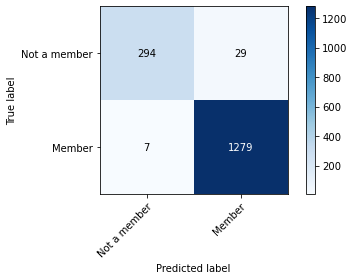

In [207]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_true = y_test
y_pred = predicted

class_names = ['Not a member', 'Member']  # name  of classes

normalize = False

# Get the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

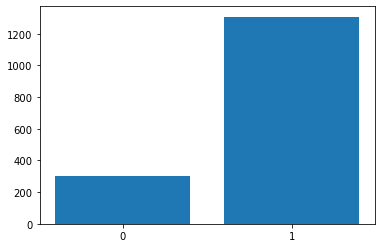

In [208]:
# plot the predicted distribution
y_predic = predicted.detach().numpy()
plt.bar([0, 1], [np.sum(y_predic == 0), np.sum(y_predic == 1)])
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [327]:
# save the model
torch.save(net.state_dict(), 'model.pt')

In [ ]:
# load the model
net = Net(dim)
net.load_state_dict(torch.load('model.pt'))


# Real Data

In [209]:
name = "Neighbour"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Neighbour already exist. Good to go!


In [210]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Best-Pars")
files = glob(join(gaia_dir, "gaia*.hdf5"))
files.sort()
files[:5]

['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5']

In [211]:
# raw = vaex.open_many(files[250:310])
data = vaex.open_many(files)
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,303.11950730746855,-27.865822360149586,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,303.10597686099044,-27.824720661451884,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,303.09523730720935,-27.787137577515743,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296875,7.986328125,8.31982421875,0.0,gspphot,4.254300117492676,0.012599945068359375,0.012599945068359375,1.0,gspphot,-0.36550000309944153,0.005600005388259888,0.005600005388259888,1.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,303.27634091220216,-28.469529127008617,858.9404,850.0156,867.84,0.2999,0.2937,0.3065,F,--,33.83838653564453,3.4127907752990723,gaia,6146.64794921875,13.3173828125,13.89794921875,0.0,gspphot,4.204100131988525,0.007100105285644531,0.0067996978759765625,0.0,gspphot,-0.5670999884605408,0.014299988746643066,0.01569998264312744,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [10]:
# cols = ["source_id", "parallax", "Jmag", "Kmag", "rv", "e_rv", "rv_cat", "pmra", "e_pmra", "pmdec", "e_pmdec", "ra", "dec", "GLON", "GLAT", ]
# data = combine[cols]
data["JK"] = data["Jmag"] - data["Kmag"]
data["M_J"] = data["Jmag"] -10 - 5*np.log10(1/data["parallax"])
data["Dist"] = 1000/data["parallax"]
data["z"] = data["Dist"]*np.sin(data["GLAT"]*np.pi/180)
data["r"] = np.sqrt(data["Dist"]**2-data["z"]**2)
data["ra"] = data["ra"]*np.pi/180
data["dec"] = data["dec"]*np.pi/180
data["GLON"] = data["GLON"]*np.pi/180 - np.pi
data["GLAT"] = data["GLAT"]*np.pi/180
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r
0,0.0031502843932647248,-1.5575987578565538,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,2.1488407759485444,-0.4863503489604674,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.44400024,4.079531477210929,643.7151545489329,-300.87410724060663,569.0729055122239
1,0.005902302104516865,-1.561738643935699,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,2.1477832341095375,-0.48231754545054356,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,0.9390001,-1.4344329552109212,1208.6112664514885,-560.5944961519982,1070.7357303637336
2,0.006857293911330601,-1.558344711578856,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,2.148604625108237,-0.4856329889900298,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.43900013,3.637716469836297,670.2807033567982,-312.86575461107884,592.7826253224063
3,0.008571259596666592,-1.5590214280897319,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,2.148417184534562,-0.48497704043229073,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296875,7.986328125,8.31982421875,0.0,gspphot,4.254300117492676,0.012599945068359375,0.012599945068359375,1.0,gspphot,-0.36550000309944153,0.005600005388259888,0.005600005388259888,1.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.36299992,3.088061577365918,1094.9332745959175,-510.44480550483127,968.671758827764
4,0.0024607048058017653,-1.5467900559720005,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,2.1515780387289176,-0.49688701975872723,858.9404,850.0156,867.84,0.2

In [212]:
# transform proper motion to Galactic coordinates; https://arxiv.org/pdf/1306.2945.pdf
delta_G = 27.12825*np.pi/180
alpha_G = 192.8594813*np.pi/180
l_ngp = 122.93192*np.pi/180 

C1 = np.sin(delta_G)*np.cos(data.dec) - np.cos(delta_G)*np.sin(data.dec)*np.cos(data.ra - alpha_G)
C2 = np.cos(delta_G)*np.sin(data.ra - alpha_G)
cosb = np.sqrt(C1**2 + C2**2)

data["pmlon"] = 1/cosb*(C1*data.pmra+C2*data.pmdec)
data["pmlat"] = 1/cosb*(-1*C2*data.pmra+C1*data.pmdec)
data["e_pmlon"] = 1/cosb*np.sqrt((C1*data.e_pmra)**2 + (C2*data.e_pmdec)**2)
data["e_pmlat"] = 1/cosb*np.sqrt((C2*data.e_pmra)**2 + (C1*data.e_pmdec)**2)
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,303.11950730746855,-27.865822360149586,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-17.92917377788606,5.3739596182324485,0.017651098887868453,0.018099304871943132
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,303.10597686099044,-27.824720661451884,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-3.8327862374649837,5.7599005936752645,0.015619902312109813,0.016650943446780583
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,303.09523730720935,-27.787137577515743,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296875,7.986328125,8.31982421875,0.0,gspphot,4.254300117492676,0.012599945068359375,0.012599945068359375,1.0,gspphot,-0.36550000309944153,0.005600005388259888,0.005600005388259888,1.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-3.1942224167478552,-0.9603148732789617,0.01597987424769363,0.01627142795736043
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,303.27634091220216,-28.469529127008617,858.9404,850.0156,867.84,0.2999,0.2937,0.3065,F,--,33.83838653564453,3.4127907752990723,gaia,6146.64794921875,13.3173828125,13.89794921875,0.0,gs

In [213]:
# calculate vertical velocities and their errors
data['vb'] = 4.74*data["pmlat"]/data["parallax"]
data["vphi"] = 4.74*data["pmlon"]/data["parallax"]
data["e_vb"] = data['vb']*np.sqrt((data["e_pmlat"]/data["pmlat"])**2 + (data["e_parallax"]/data["parallax"])**2)
data["e_vphi"] = data['vphi']*np.sqrt((data["e_pmlon"]/data["pmlon"])**2 + (data["e_parallax"]/data["parallax"])**2)

data["w"] = data["vb"]*np.cos(data.GLAT) + data["rv"]*np.sin(data.GLAT)
data["e_w"] = np.sqrt(data["e_vb"]**2*np.cos(data.GLAT)**2 + data["e_rv"]**2*np.sin(data.GLAT)**2)
data["v_xy"] = data["rv"]*np.cos(data.GLAT) - data["vb"]*np.sin(data.GLAT)
data["e_v_xy"] = np.sqrt(data["e_rv"]**2*np.cos(data.GLAT)**2 + data["e_vb"]**2*np.sin(data.GLAT)**2)
data["v"] = data["vphi"]*np.sin(data.GLON) + data["v_xy"]*np.cos(data.GLON)
data["e_v"] = np.sqrt(data["e_vphi"]**2*np.sin(data.GLON)**2 + data["e_v_xy"]**2*np.cos(data.GLON)**2)
data["u"] = data["vphi"]*np.cos(data.GLON) - data["v_xy"]*np.sin(data.GLON)
data["e_u"] = np.sqrt(data["e_vphi"]**2*np.cos(data.GLON)**2 + data["e_v_xy"]**2*np.sin(data.GLON)**2)
data

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,303.11950730746855,-27.865822360149586,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-17.92917377788606,5.3739596182324485,0.017651098887868453,0.018099304871943132,16.39707842694167,-54.705671320797684,0.18220838729492037,-0.5818072821846905,-75.76444209905829,1.9613356778247373,-133.75400278580753,4.515163476682861,-60.56011429619868,0.6145017907126534,131.20715030941074,4.510830132468406
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,303.10597686099044,-27.824720661451884,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-3.8327862374649837,5.7599005936752645,0.015619902312109813,0.016650943446780583,18.299956048459066,-12.177262185004713,0.19233485165659633,-0.13267863142199784,-20.08267965836619,2.8367468349774656,0.4905191517030909,5.867942332977979,-12.128692797633875,0.3634705396494124,-1.192113409520022,5.858177191686679
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,303.09523730720935,-27.787137577515743,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296

In [220]:
df_rv_nan = data[data.rv.isnan()]
none = len(df_rv_nan)
df_rv = data[~data.rv.isnan()]
df_rv_group = data.groupby('rv_cat', agg={'count': vaex.agg.count('rv_cat')})
df_rv_group = df_rv_group.to_pandas_df()
df_rv_group.at[0, 'count'] = none
df_rv_group.sort_values(by='rv_cat', ascending=True, inplace=True)
df_rv_group

,rv_cat,count
2,apogee,318920
5,gaia,22948443
1,galah,345960
4,lamost,448389
3,rave,32772
0,None,5032847


In [224]:
df_rv

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,303.11950730746855,-27.865822360149586,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-17.92917377788606,5.3739596182324485,0.017651098887868453,0.018099304871943132,16.39707842694167,-54.705671320797684,0.18220838729492037,-0.5818072821846905,-75.76444209905829,1.9613356778247373,-133.75400278580753,4.515163476682861,-60.56011429619868,0.6145017907126534,131.20715030941074,4.510830132468406
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,303.10597686099044,-27.824720661451884,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-3.8327862374649837,5.7599005936752645,0.015619902312109813,0.016650943446780583,18.299956048459066,-12.177262185004713,0.19233485165659633,-0.13267863142199784,-20.08267965836619,2.8367468349774656,0.4905191517030909,5.867942332977979,-12.128692797633875,0.3634705396494124,-1.192113409520022,5.858177191686679
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,303.09523730720935,-27.787137577515743,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296

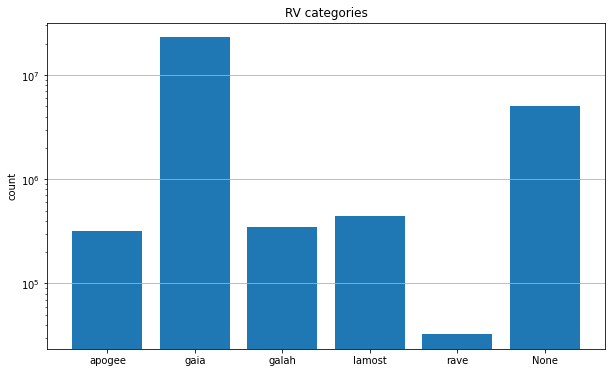

In [221]:
x = df_rv_group['rv_cat'].values.astype(str)
y = df_rv_group['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('RV categories')
ax.yaxis.grid(True)
plt.show()

In [226]:
df_teff_nan = df_rv[df_rv.teff.isnan()]
none = len(df_teff_nan)
df_teff = df_rv[~df_rv.teff.isnan()]
df_teff_group = df_rv.groupby('teff_cat', agg={'count': vaex.agg.count('teff_cat')})
df_teff_group = df_teff_group.to_pandas_df()
df_teff_group.at[0, 'count'] = none
df_teff_group.sort_values(by='teff_cat', ascending=True, inplace=True)
df_teff_group

,teff_cat,count
2,apogee,200347
1,galah,101845
3,gspphot,18471993
5,lamost,473520
4,rave,129947
0,None,4716832


In [227]:
df_teff

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,303.11950730746855,-27.865822360149586,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-17.92917377788606,5.3739596182324485,0.017651098887868453,0.018099304871943132,16.39707842694167,-54.705671320797684,0.18220838729492037,-0.5818072821846905,-75.76444209905829,1.9613356778247373,-133.75400278580753,4.515163476682861,-60.56011429619868,0.6145017907126534,131.20715030941074,4.510830132468406
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,303.10597686099044,-27.824720661451884,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-3.8327862374649837,5.7599005936752645,0.015619902312109813,0.016650943446780583,18.299956048459066,-12.177262185004713,0.19233485165659633,-0.13267863142199784,-20.08267965836619,2.8367468349774656,0.4905191517030909,5.867942332977979,-12.128692797633875,0.3634705396494124,-1.192113409520022,5.858177191686679
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,303.09523730720935,-27.787137577515743,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296

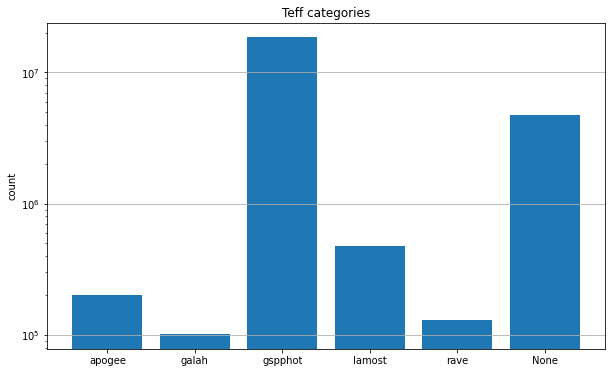

In [225]:
x = df_teff_group['teff_cat'].values.astype(str)
y = df_teff_group['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('Teff categories')
ax.yaxis.grid(True)
plt.show()

In [229]:
df_logg_nan = df_teff[df_teff.logg.isnan()]
none = len(df_logg_nan)
df_logg = df_teff[~df_teff.logg.isnan()]

df_logg_group = df_teff.groupby('logg_cat', agg={'count': vaex.agg.count('logg_cat')})
df_logg_group = df_logg_group.to_pandas_df()
df_logg_group.at[0, 'count'] = none
df_logg_group.sort_values(by='logg_cat', ascending=True, inplace=True)
df_logg_group

,logg_cat,count
2,apogee,180381
1,galah,103126
3,gspphot,18606902
5,lamost,357287
4,rave,129947
0,None,9


In [230]:
df_logg

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,303.11950730746855,-27.865822360149586,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,G,--,152.84475708007812,4.919384002685547,gaia,5675.6103515625,11.37353515625,13.83251953125,0.0,gspphot,4.49429988861084,0.006199836730957031,0.004800319671630859,0.0,gspphot,-0.5550000071525574,0.016799986362457275,0.01639997959136963,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-17.92917377788606,5.3739596182324485,0.017651098887868453,0.018099304871943132,16.39707842694167,-54.705671320797684,0.18220838729492037,-0.5818072821846905,-75.76444209905829,1.9613356778247373,-133.75400278580753,4.515163476682861,-60.56011429619868,0.6145017907126534,131.20715030941074,4.510830132468406
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,303.10597686099044,-27.824720661451884,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,G,--,8.28650951385498,6.514820575714111,gaia,5750.4326171875,5.1650390625,4.8857421875,0.0,gspphot,4.354100227355957,0.006400108337402344,0.006499767303466797,0.0,gspphot,-0.2969000041484833,0.007499992847442627,0.006400018930435181,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-3.8327862374649837,5.7599005936752645,0.015619902312109813,0.016650943446780583,18.299956048459066,-12.177262185004713,0.19233485165659633,-0.13267863142199784,-20.08267965836619,2.8367468349774656,0.4905191517030909,5.867942332977979,-12.128692797633875,0.3634705396494124,-1.192113409520022,5.858177191686679
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,303.09523730720935,-27.787137577515743,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,F,--,-9.221250534057617,6.796242713928223,gaia,6268.86279296

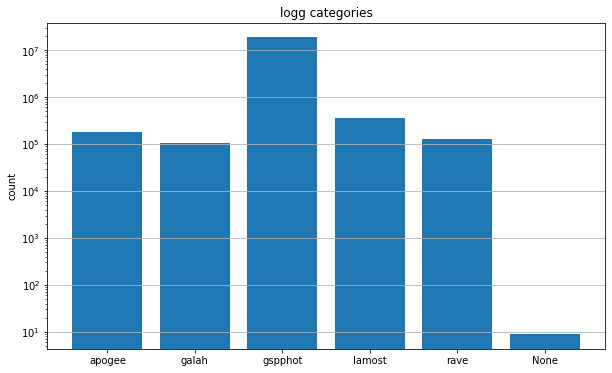

In [231]:
x = df_logg_group['logg_cat'].values.astype(str)
y = df_logg_group['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('logg categories')
ax.yaxis.grid(True)
plt.show()

In [244]:
# df_mh_nan = df_logg[df_logg.mh.isnan() | df_logg.feh.isnan()]
df_mh_nan = df_logg[df_logg.mh.isnan()]
none = len(df_mh_nan)
df_mh = df_logg[~df_logg.mh.isnan()]

df_mh_group = df_logg.groupby('mh_cat', agg={'count': vaex.agg.count('mh_cat')})
df_mh_group = df_mh_group.to_pandas_df()
df_mh_group.at[0, 'count'] = none
df_mh_group.sort_values(by='mh_cat', ascending=True, inplace=True)
df_mh_group

,mh_cat,count
2,apogee,223885
3,gspphot,18598672
1,gspspec,364121
4,rave,9494
0,None,181471


# TODO: combine feh and mh

In [245]:
# # df_mh_nan = df_logg[df_logg.mh.isnan() | df_logg.feh.isnan()]
# df_feh_nan = df_logg[df_logg.feh.isnan()]
# none = len(df_feh_nan)
# df_feh = df_logg[~df_logg.feh.isnan()]

# df_mh_group = df_logg.groupby('mh_cat', agg={'count': vaex.agg.count('mh_cat')})
# df_mh_group = df_mh_group.to_pandas_df()
# df_mh_group.at[0, 'count'] = none
# df_mh_group.sort_values(by='mh_cat', ascending=True, inplace=True)
# df_mh_group

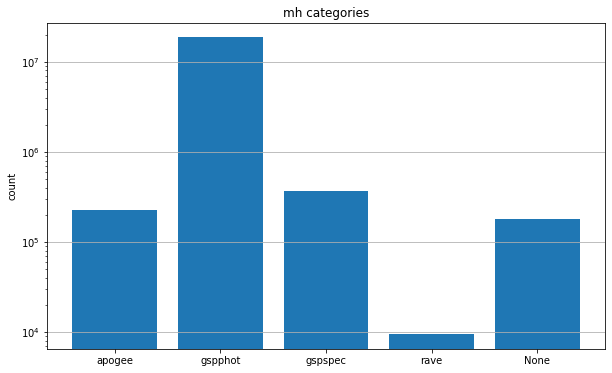

In [246]:
x = df_mh_group['mh_cat'].values.astype(str)
y = df_mh_group['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('mh categories')
ax.yaxis.grid(True)
plt.show()


In [247]:
df_alpha_nan = df_mh[df_mh.alphafe.isnan()]
none = len(df_alpha_nan)
df_alpha = df_mh[~df_mh.alphafe.isnan()]

df_alpha_group = df_mh.groupby('alphafe_cat', agg={'count': vaex.agg.count('alphafe_cat')})
df_alpha_group = df_alpha_group.to_pandas_df()
df_alpha_group.at[0, 'count'] = none
df_alpha_group.sort_values(by='alphafe_cat', ascending=True, inplace=True)
df_alpha_group

,alphafe_cat,count
1,galah,200369
2,gspspec,2737723
3,rave,50195
0,None,16207885


In [248]:
df_alpha

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937
1,0.294981,-86.290771,10.375,9.943,AAA,4616471475285628544,61.11598,60.94378883292213,0.016666066,-4.584461913866106,0.016478,4.2861877607420436,0.014077348,11.580402,11.982926,11.0129175,1778.6704,3653.861,1.1881931,1.210478,303.86984897182504,-30.745532184890003,231.7795,231.046,232.5471,0.0795,0.0749,0.0829,G,--,28.699419021606445,1.0560362339019775,gaia,5371.447265625,8.34130859375,5.8271484375,0.0,gspphot,4.353600025177002,0.0019998550415039062,0.0020999908447265625,0.0,gspphot,0.16830000281333923,0.008599996566772461,0.006999999284744263,0.0,gspphot,-0.07999999821186066,0.03999999910593033,0.029999997466802597,0.0,gspspec,-0.07000000029802322,0.1600000038743019,0.12000000104308128,0.0,gspspec,-0.07000000029802322,nan,nan,nan,--,61.115976075957114,-0.012515371815370784,0.01666501933856804,0.016479058649024093,-0.013840472166946621,67.58680271857348,-0.018223882236204778,0.2227425514427948,17.81996160596155,0.6562654507663453,22.496795596228186,0.8275628648798089,36.82562677873446,0.563125787695428,-60.97503526994633,0.6460370630108823
2,0.603113,-86.341759,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,303.8348243897451,-30.70014661878395,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-61.3864333951077,-21.2189662891518,0.012385787215780944,0.012389302722927651,-8.511937552026382,-24.625020864843954,-0.009205451606335813,-0.022960570044604615,14.851189195470877,0.6704771844152274,30.04905331909416,0.77097448330084,-37.97100422000525,0.47978596434245574,-8.218278195103133,0.6039323390064075
3,0.871343,-86.256317,10.142,10.071,AAA,4616472368638823552,38.828796,36.488216896790455,0.012902678,-13.277249047885542,0.013225412,1.6626270579400522,0.011533617,10.65063,10.767785,10.438435,991.6122,19

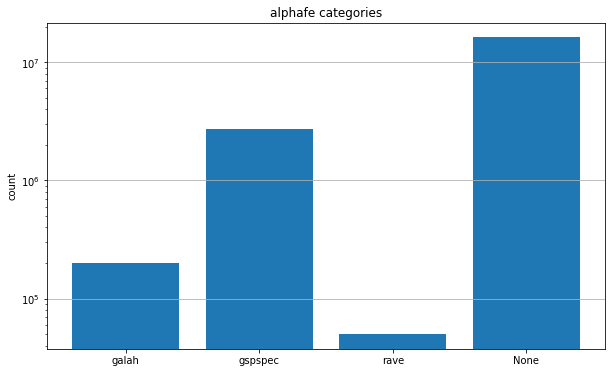

In [249]:
x = df_alpha_group['alphafe_cat'].values.astype(str)
y = df_alpha_group['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('alphafe categories')
ax.yaxis.grid(True)
plt.show()


In [255]:
df_alpha

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937
1,0.294981,-86.290771,10.375,9.943,AAA,4616471475285628544,61.11598,60.94378883292213,0.016666066,-4.584461913866106,0.016478,4.2861877607420436,0.014077348,11.580402,11.982926,11.0129175,1778.6704,3653.861,1.1881931,1.210478,303.86984897182504,-30.745532184890003,231.7795,231.046,232.5471,0.0795,0.0749,0.0829,G,--,28.699419021606445,1.0560362339019775,gaia,5371.447265625,8.34130859375,5.8271484375,0.0,gspphot,4.353600025177002,0.0019998550415039062,0.0020999908447265625,0.0,gspphot,0.16830000281333923,0.008599996566772461,0.006999999284744263,0.0,gspphot,-0.07999999821186066,0.03999999910593033,0.029999997466802597,0.0,gspspec,-0.07000000029802322,0.1600000038743019,0.12000000104308128,0.0,gspspec,-0.07000000029802322,nan,nan,nan,--,61.115976075957114,-0.012515371815370784,0.01666501933856804,0.016479058649024093,-0.013840472166946621,67.58680271857348,-0.018223882236204778,0.2227425514427948,17.81996160596155,0.6562654507663453,22.496795596228186,0.8275628648798089,36.82562677873446,0.563125787695428,-60.97503526994633,0.6460370630108823
2,0.603113,-86.341759,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,303.8348243897451,-30.70014661878395,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-61.3864333951077,-21.2189662891518,0.012385787215780944,0.012389302722927651,-8.511937552026382,-24.625020864843954,-0.009205451606335813,-0.022960570044604615,14.851189195470877,0.6704771844152274,30.04905331909416,0.77097448330084,-37.97100422000525,0.47978596434245574,-8.218278195103133,0.6039323390064075
3,0.871343,-86.256317,10.142,10.071,AAA,4616472368638823552,38.828796,36.488216896790455,0.012902678,-13.277249047885542,0.013225412,1.6626270579400522,0.011533617,10.65063,10.767785,10.438435,991.6122,19

In [256]:
df_alpha.export(join(data_dir, 'alphafe.hdf5'), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :   181.23s =  3.0m =  0.1h     
 

In [282]:
df_alpha = vaex.open(join(data_dir, 'alphafe.hdf5'))
df_alpha

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937
1,0.294981,-86.290771,10.375,9.943,AAA,4616471475285628544,61.11598,60.94378883292213,0.016666066,-4.584461913866106,0.016478,4.2861877607420436,0.014077348,11.580402,11.982926,11.0129175,1778.6704,3653.861,1.1881931,1.210478,303.86984897182504,-30.745532184890003,231.7795,231.046,232.5471,0.0795,0.0749,0.0829,G,--,28.699419021606445,1.0560362339019775,gaia,5371.447265625,8.34130859375,5.8271484375,0.0,gspphot,4.353600025177002,0.0019998550415039062,0.0020999908447265625,0.0,gspphot,0.16830000281333923,0.008599996566772461,0.006999999284744263,0.0,gspphot,-0.07999999821186066,0.03999999910593033,0.029999997466802597,0.0,gspspec,-0.07000000029802322,0.1600000038743019,0.12000000104308128,0.0,gspspec,-0.07000000029802322,nan,nan,nan,--,61.115976075957114,-0.012515371815370784,0.01666501933856804,0.016479058649024093,-0.013840472166946621,67.58680271857348,-0.018223882236204778,0.2227425514427948,17.81996160596155,0.6562654507663453,22.496795596228186,0.8275628648798089,36.82562677873446,0.563125787695428,-60.97503526994633,0.6460370630108823
2,0.603113,-86.341759,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,303.8348243897451,-30.70014661878395,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-61.3864333951077,-21.2189662891518,0.012385787215780944,0.012389302722927651,-8.511937552026382,-24.625020864843954,-0.009205451606335813,-0.022960570044604615,14.851189195470877,0.6704771844152274,30.04905331909416,0.77097448330084,-37.97100422000525,0.47978596434245574,-8.218278195103133,0.6039323390064075
3,0.871343,-86.256317,10.142,10.071,AAA,4616472368638823552,38.828796,36.488216896790455,0.012902678,-13.277249047885542,0.013225412,1.6626270579400522,0.011533617,10.65063,10.767785,10.438435,991.6122,19

(-2.0, 1.2)

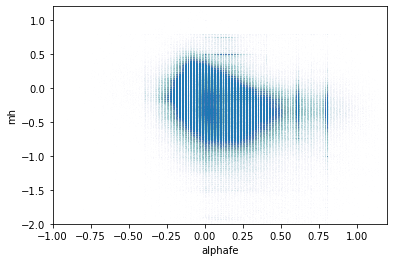

In [283]:
df_alpha.viz.scatter('alphafe', 'mh', length_check=False, s=0.1, alpha=0.01)
plt.xlim(-1, 1.2)
plt.ylim(-2, 1.2)

# Doing Machine Learning

In [284]:
columns_ml

['pmra',
 'pmdec',
 'mag_g',
 'mag_bp',
 'mag_rp',
 'feh',
 'alphafe',
 'logg',
 'teff',
 'TD_D',
 'population',
 'radial_velocity',
 'barycentric_distance']

In [285]:
df_alpha.column_names

['ra',
 'dec',
 'Jmag',
 'Kmag',
 'ph_qual',
 'source_id',
 'pm',
 'pmra',
 'e_pmra',
 'pmdec',
 'e_pmdec',
 'parallax',
 'e_parallax',
 'gmag',
 'bpmag',
 'rpmag',
 'fb_over_err',
 'fr_over_err',
 'ruwe',
 'excess_factor',
 'GLON',
 'GLAT',
 'distance_gspphot',
 'distance_gspphot_lower',
 'distance_gspphot_upper',
 'ag_gspphot',
 'ag_gspphot_lower',
 'ag_gspphot_upper',
 'spectraltype_esphs',
 'subclass_lamost',
 'rv',
 'e_rv',
 'rv_cat',
 'teff',
 'e_teff_lower',
 'e_teff_upper',
 'teff_symmetric',
 'teff_cat',
 'logg',
 'e_logg_lower',
 'e_logg_upper',
 'logg_symmetric',
 'logg_cat',
 'mh',
 'e_mh_lower',
 'e_mh_upper',
 'mh_symmetric',
 'mh_cat',
 'alphafe',
 'e_alphafe_lower',
 'e_alphafe_upper',
 'alphafe_symmetric',
 'alphafe_cat',
 'fem',
 'e_fem_lower',
 'e_fem_upper',
 'fem_symmetric',
 'fem_cat',
 'feh',
 'e_feh_lower',
 'e_feh_upper',
 'feh_symmetric',
 'feh_cat',
 'pmlon',
 'pmlat',
 'e_pmlon',
 'e_pmlat',
 'vb',
 'vphi',
 'e_vb',
 'e_vphi',
 'w',
 'e_w',
 'v_xy',
 'e_v_xy

In [286]:
df_alpha['distance'] = 1000/df_alpha.parallax
df_alpha

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,distance
0,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937,1208.6112664514885
1,0.294981,-86.290771,10.375,9.943,AAA,4616471475285628544,61.11598,60.94378883292213,0.016666066,-4.584461913866106,0.016478,4.2861877607420436,0.014077348,11.580402,11.982926,11.0129175,1778.6704,3653.861,1.1881931,1.210478,303.86984897182504,-30.745532184890003,231.7795,231.046,232.5471,0.0795,0.0749,0.0829,G,--,28.699419021606445,1.0560362339019775,gaia,5371.447265625,8.34130859375,5.8271484375,0.0,gspphot,4.353600025177002,0.0019998550415039062,0.0020999908447265625,0.0,gspphot,0.16830000281333923,0.008599996566772461,0.006999999284744263,0.0,gspphot,-0.07999999821186066,0.03999999910593033,0.029999997466802597,0.0,gspspec,-0.07000000029802322,0.1600000038743019,0.12000000104308128,0.0,gspspec,-0.07000000029802322,nan,nan,nan,--,61.115976075957114,-0.012515371815370784,0.01666501933856804,0.016479058649024093,-0.013840472166946621,67.58680271857348,-0.018223882236204778,0.2227425514427948,17.81996160596155,0.6562654507663453,22.496795596228186,0.8275628648798089,36.82562677873446,0.563125787695428,-60.97503526994633,0.6460370630108823,233.30755809607268
2,0.603113,-86.341759,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,303.8348243897451,-30.70014661878395,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-61.3864333951077,-21.2189662891518,0.012385787215780944,0.012389302722927651,-8.511937552026382,-24.625020864843954,-0.009205451606335813,-0.022960570044604615,14.851189195470877,0.6704771844152274,30.04905331909416,0.77097448330084,-37.97100422000525,0.47978596434245574,-8.218278195103133,0.6039323390064075,84.63029685651593
3,0.871343,-86.256317,10.142,10.071,AAA,4616472368638823552,38.828796,36.488216896790455,0.012902678,-13.277249047885542,0.013225412,1.6626

## add TD_D first

In [292]:
# check Bensby et al (2014)
# Bensby, T., Feltzing, S., Oey, M.S. 2014. Exploring the Milky Way Stellar Disk: A Detailed Elmental Abundance Study of 714 F and G Dwarf Stars in the Solar Neighbourhood. Astronomy& Astrophysics
df_alpha["u_LSR"] = df_alpha["u"]# - 11.1
df_alpha["v_LSR"] = df_alpha["v"]# - 12.4
df_alpha["w_LSR"] = df_alpha["w"]# + 7.25

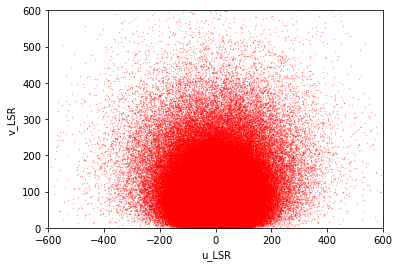

In [293]:
df_alpha.viz.scatter("u_LSR", "(v_LSR**2+w_LSR**2)**(1/2)", c='r', alpha=0.5, s=0.1, length_check=False)
plt.xlabel("u_LSR")
plt.ylabel("v_LSR")
plt.xlim(-600, 600)
plt.ylim(0, 600)
plt.show()

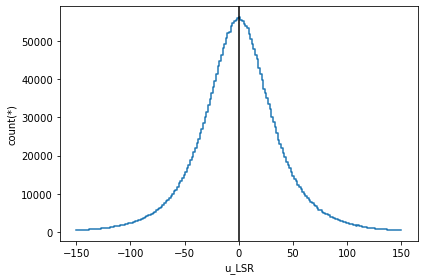

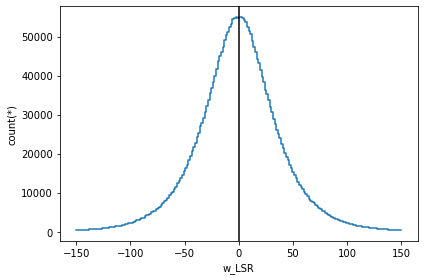

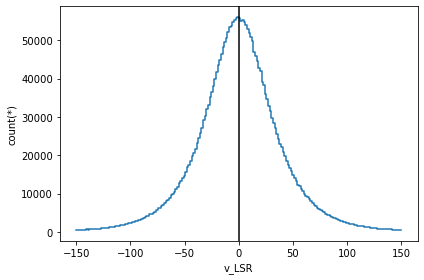

In [294]:

df_alpha.viz.histogram("u_LSR", limits=[-150, 150], shape=200)
# plt.axvline(11.1, c="k")
plt.axvline(0, c="k")
plt.show()
df_alpha.viz.histogram("w_LSR", limits=[-150, 150], shape=200)
plt.axvline(0, c="k")
plt.show()
df_alpha.viz.histogram("v_LSR", limits=[-150, 150], shape=200)
plt.axvline(0, c="k")
plt.show()

In [296]:
from scipy.stats import norm

df_alpha["f_D"] = (norm.pdf(df_alpha["u_LSR"].to_numpy(), loc=0, scale=35)*
                norm.pdf(df_alpha["v_LSR"].to_numpy(), loc=-15, scale=20)*
                norm.pdf(df_alpha["w_LSR"].to_numpy(), loc=0, scale=16))
df_alpha["f_TD"] = (norm.pdf(df_alpha["u_LSR"].to_numpy(), loc=0, scale=67)*
                norm.pdf(df_alpha["v_LSR"].to_numpy(), loc=-46, scale=38)*
                norm.pdf(df_alpha["w_LSR"].to_numpy(), loc=0, scale=35))
df_alpha["f_H"] = (norm.pdf(df_alpha["u_LSR"].to_numpy(), loc=0, scale=160)*
                norm.pdf(df_alpha["v_LSR"].to_numpy(), loc=-220, scale=90)*
                norm.pdf(df_alpha["w_LSR"].to_numpy(), loc=0, scale=90))
df_alpha

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,distance,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H
0,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937,1208.6112664514885,-2.8826176734975437,-39.26530366780173,-49.03206856343631,2.472438723528149e-08,2.6267293448296396e-07,5.622244418733452e-09
1,0.294981,-86.290771,10.375,9.943,AAA,4616471475285628544,61.11598,60.94378883292213,0.016666066,-4.584461913866106,0.016478,4.2861877607420436,0.014077348,11.580402,11.982926,11.0129175,1778.6704,3653.861,1.1881931,1.210478,303.86984897182504,-30.745532184890003,231.7795,231.046,232.5471,0.0795,0.0749,0.0829,G,--,28.699419021606445,1.0560362339019775,gaia,5371.447265625,8.34130859375,5.8271484375,0.0,gspphot,4.353600025177002,0.0019998550415039062,0.0020999908447265625,0.0,gspphot,0.16830000281333923,0.008599996566772461,0.006999999284744263,0.0,gspphot,-0.07999999821186066,0.03999999910593033,0.029999997466802597,0.0,gspspec,-0.07000000029802322,0.1600000038743019,0.12000000104308128,0.0,gspspec,-0.07000000029802322,nan,nan,nan,--,61.115976075957114,-0.012515371815370784,0.01666501933856804,0.016479058649024093,-0.013840472166946621,67.58680271857348,-0.018223882236204778,0.2227425514427948,17.81996160596155,0.6562654507663453,22.496795596228186,0.8275628648798089,36.82562677873446,0.563125787695428,-60.97503526994633,0.6460370630108823,233.30755809607268,-60.97503526994633,36.82562677873446,17.81996160596155,2.3281573474580542e-08,3.846377294777674e-08,7.617558350082556e-10
2,0.603113,-86.341759,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,303.8348243897451,-30.70014661878395,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-61.3864333951077,-21.2189662891518,0.012385787215780944,0.012389302722927651,-8.511937552026382,-24.625020864843954,-0.009205451606335813,-0.022960570044604615,14.851189195470877,0.67047718

In [297]:
df_alpha["fTD_fD"] = df_alpha["f_TD"]/df_alpha["f_D"]
df_alpha["fTD_fH"] = df_alpha["f_TD"]/df_alpha["f_H"]
df_alpha

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,distance,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH
0,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937,1208.6112664514885,-2.8826176734975437,-39.26530366780173,-49.03206856343631,2.472438723528149e-08,2.6267293448296396e-07,5.622244418733452e-09,10.624042245549848,46.7202979663658
1,0.294981,-86.290771,10.375,9.943,AAA,4616471475285628544,61.11598,60.94378883292213,0.016666066,-4.584461913866106,0.016478,4.2861877607420436,0.014077348,11.580402,11.982926,11.0129175,1778.6704,3653.861,1.1881931,1.210478,303.86984897182504,-30.745532184890003,231.7795,231.046,232.5471,0.0795,0.0749,0.0829,G,--,28.699419021606445,1.0560362339019775,gaia,5371.447265625,8.34130859375,5.8271484375,0.0,gspphot,4.353600025177002,0.0019998550415039062,0.0020999908447265625,0.0,gspphot,0.16830000281333923,0.008599996566772461,0.006999999284744263,0.0,gspphot,-0.07999999821186066,0.03999999910593033,0.029999997466802597,0.0,gspspec,-0.07000000029802322,0.1600000038743019,0.12000000104308128,0.0,gspspec,-0.07000000029802322,nan,nan,nan,--,61.115976075957114,-0.012515371815370784,0.01666501933856804,0.016479058649024093,-0.013840472166946621,67.58680271857348,-0.018223882236204778,0.2227425514427948,17.81996160596155,0.6562654507663453,22.496795596228186,0.8275628648798089,36.82562677873446,0.563125787695428,-60.97503526994633,0.6460370630108823,233.30755809607268,-60.97503526994633,36.82562677873446,17.81996160596155,2.3281573474580542e-08,3.846377294777674e-08,7.617558350082556e-10,1.6521122590692825,50.49357179831762
2,0.603113,-86.341759,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,303.8348243897451,-30.70014661878395,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-61.3864333951077,-21.2189662891518,0.012385787215780944,0.012389302722927651,-8.511937552026382,-24.62

In [300]:
df_alpha['TD_D']=  df_alpha.evaluate('fTD_fD*0.09/0.85')
df_alpha

/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: divide by zero encountered in divide
  result_data = op['op'](a_data, b_data)
/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/arrow/numpy_dispatch.py:72: RuntimeWarning: invalid value encountered in divide
  result_data = op['op'](a_data, b_data)


#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,distance,u_LSR,v_LSR,w_LSR,f_D,f_TD,f_H,fTD_fD,fTD_fH,TD_D
0,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,303.05891462343493,-27.634759739425405,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,K,--,30.259687423706055,0.167822003364563,gaia,4251.74755859375,142.98876953125,39.806640625,0.0,gspphot,2.018699884414673,0.2597998380661011,0.024700164794921875,0.0,gspphot,0.11720000207424164,0.006000004708766937,0.002799995243549347,0.0,gspphot,-0.05000000074505806,0.0,0.010000001639127731,0.0,gspspec,-0.12999999523162842,0.09000000357627869,0.09999999590218067,0.0,gspspec,-0.12999999523162842,nan,nan,nan,--,-6.869035410259549,6.73802817919667,0.014363532944433897,0.014548223495305629,38.6009330947519,-39.35144959998115,0.5971231353840589,-0.6083649032640475,-49.03206856343631,0.4894604735931237,-1.2397464080963196,0.38098386896846387,-39.26530366780173,0.6063392240716132,-2.8826176734975437,0.3841995696117937,1208.6112664514885,-2.8826176734975437,-39.26530366780173,-49.03206856343631,2.472438723528149e-08,2.6267293448296396e-07,5.622244418733452e-09,10.624042245549848,46.7202979663658,1.124898590705278
1,0.294981,-86.290771,10.375,9.943,AAA,4616471475285628544,61.11598,60.94378883292213,0.016666066,-4.584461913866106,0.016478,4.2861877607420436,0.014077348,11.580402,11.982926,11.0129175,1778.6704,3653.861,1.1881931,1.210478,303.86984897182504,-30.745532184890003,231.7795,231.046,232.5471,0.0795,0.0749,0.0829,G,--,28.699419021606445,1.0560362339019775,gaia,5371.447265625,8.34130859375,5.8271484375,0.0,gspphot,4.353600025177002,0.0019998550415039062,0.0020999908447265625,0.0,gspphot,0.16830000281333923,0.008599996566772461,0.006999999284744263,0.0,gspphot,-0.07999999821186066,0.03999999910593033,0.029999997466802597,0.0,gspspec,-0.07000000029802322,0.1600000038743019,0.12000000104308128,0.0,gspspec,-0.07000000029802322,nan,nan,nan,--,61.115976075957114,-0.012515371815370784,0.01666501933856804,0.016479058649024093,-0.013840472166946621,67.58680271857348,-0.018223882236204778,0.2227425514427948,17.81996160596155,0.6562654507663453,22.496795596228186,0.8275628648798089,36.82562677873446,0.563125787695428,-60.97503526994633,0.6460370630108823,233.30755809607268,-60.97503526994633,36.82562677873446,17.81996160596155,2.3281573474580542e-08,3.846377294777674e-08,7.617558350082556e-10,1.6521122590692825,50.49357179831762,0.17492953331321814
2,0.603113,-86.341759,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,303.8348243897451,-30.70014661878395,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,M,--,32.41990661621094,1.0216929912567139,gaia,3918.379638671875,5.97119140625,8.631103515625,0.0,gspphot,4.763700008392334,0.004499912261962891,0.010499954223632812,0.0,gspphot,-0.4165000021457672,0.039000004529953,0.03979998826980591,0.0,gspphot,0.07999999821186066,0.04999999888241291,0.07000000774860382,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-61.3864333951077,-21.2189662891518,0.012385787215780944,0.0

Text(0, 0.5, 'TD/D')

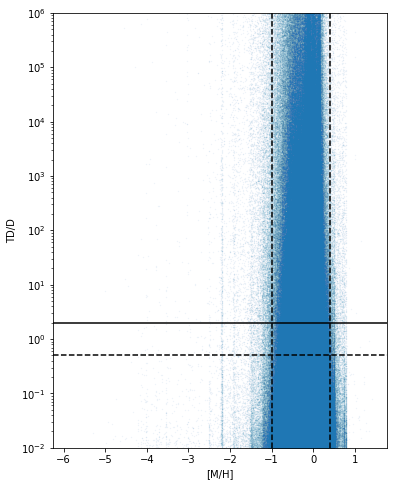

In [302]:
plt.figure(figsize=(6, 8))
df_alpha.viz.scatter("mh", "TD_D", length_check=False, s=0.1, alpha=0.1)
plt.yscale("log")
plt.ylim(1e-2, 1e6)
plt.axvline(0.4, c="k", ls="--")
plt.axvline(-1, c="k", ls="--")
# plt.axvline(-0.3, c="r")
plt.axhline(2, c="k")
plt.axhline(0.5, c="k", ls="--")
plt.xlabel("[M/H]")
plt.ylabel("TD/D")
# plt.text(-4.2, 2E-1, "Piringan tipis")
# plt.text(-4.2, 0.9, "Antara")
# plt.text(-4.2, 4, "Piringan tebal")

In [319]:
columns_ml_2 = ['pmra', 'pmdec', 'gmag', 'bpmag', 'rpmag', 'mh', 'alphafe', 'logg', 'teff', 'TD_D', 'rv', 'distance']

X_data = df_alpha[columns_ml_2].to_pandas_df()
# remove infinities from TD_D
X_data = X_data.replace([np.inf, -np.inf], np.nan)
X_data = X_data.dropna()
X_data


,pmra,pmdec,gmag,bpmag,rpmag,mh,alphafe,logg,teff,TD_D,rv,distance
0,7.609581,-5.888884,11.280521,12.197066,10.340994,0.11720,-0.05,2.0187,4251.747559,1.124899e+00,30.259687,1208.611266
1,60.943789,-4.584462,11.580402,11.982926,11.012918,0.16830,-0.08,4.3536,5371.447266,1.749295e-01,28.699419,233.307558
2,-64.846788,3.665081,13.398380,14.354399,12.430805,-0.41650,0.08,4.7637,3918.379639,3.610499e-02,32.419907,84.630297
3,36.488217,-13.277249,10.650630,10.767785,10.438435,-0.20360,0.46,3.9882,8170.015137,6.774972e+02,-15.129750,601.457792
4,-6.972858,-32.839155,11.051230,11.615906,10.334627,-0.41000,0.14,2.7100,4737.000000,3.409626e+06,28.132523,750.896014
...,...,...,...,...,...,...,...,...,...,...,...,...
2988282,0.724137,9.100896,11.982981,12.329554,11.463715,-0.43100,0.55,4.0191,6157.881348,1.286920e-02,-8.979564,546.412644
2988283,11.739432,1.345641,11.078534,11.397778,10.588304,-0.14079,0.10,3.6613,6104.391602,2.872994e-02,-21.296846,547.778668
2988284,-6.591928,-4.037416,11.542129,12.223011,10.748159,0.08680,-0.04,2.7128,4766.894531,2.197434e-01,-38.689720,1077.557544
2988285,-5.307093,-0.767432,11.933714,12.329568,11.364099,-0.28300,0.02,3.8638,5981.024902,2.935071e-02,-29.050955,492.626343


In [320]:
X_data.max()

pmra         2.862796e+03
pmdec        1.299313e+03
gmag         1.667936e+01
bpmag        1.932416e+01
rpmag        1.529321e+01
mh           1.420000e+00
alphafe      3.760000e+00
logg         5.159100e+00
teff         4.000486e+04
TD_D        2.809377e+245
rv           9.551280e+02
distance     1.530509e+04
dtype: float64

In [321]:
X_scaled_data = scaler.fit_transform(X_data)
X_scaled_data

array([[5.08532615e-001, 7.38478370e-001, 5.31582260e-001, ...,
        3.97418688e-246, 5.25055091e-001, 7.87888162e-002],
       [5.17713109e-001, 7.38739736e-001, 5.57600751e-001, ...,
        5.92764470e-247, 5.24253851e-001, 1.50522751e-002],
       [4.96060597e-001, 7.40392686e-001, 7.15333470e-001, ...,
        9.86173867e-248, 5.26164422e-001, 5.33614840e-003],
       ...,
       [5.06088090e-001, 7.38849346e-001, 5.54280011e-001, ...,
        7.52279696e-247, 4.89647704e-001, 7.02243958e-002],
       [5.06309250e-001, 7.39504549e-001, 5.88255024e-001, ...,
        7.45754925e-248, 4.94597471e-001, 3.19988756e-002],
       [5.06889701e-001, 7.39960456e-001, 6.66428407e-001, ...,
        2.15817322e-244, 4.63742255e-001, 1.44565553e-001]])

In [323]:
inputs = torch.Tensor(X_scaled_data).float()

outputs = net(inputs)
predicted = (outputs > 0.5).float()

predicted

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

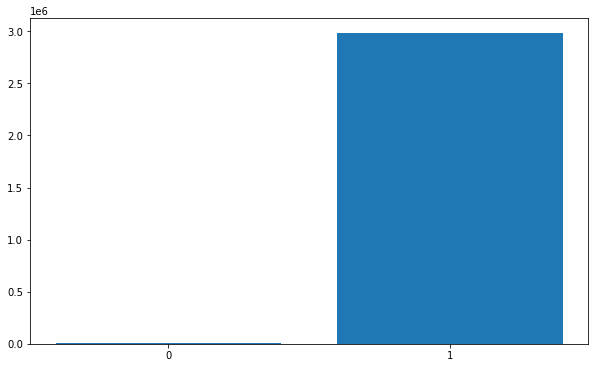

(7097, 2981120)

In [326]:
# plot the predicted values distribution in bar chart
pred = predicted.detach().numpy()
plt.figure(figsize=(10, 6))
plt.bar([0, 1], [np.sum(pred == 0), np.sum(pred == 1)])
plt.xticks([0, 1], ['0', '1'])
plt.show()
np.sum(pred == 0), np.sum(pred == 1)
